----
### Part I

Do these exercises in `explore.ipynb` notebook. As always, add, commit, and push your changes.

**Section 1 - iris_db:** Using iris data from our MySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [202]:
# import data manipulations
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

# import visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import stats to run stats tests
from scipy import stats

# import my own functions
import acquire
import prepare
try:
    import env
except:
    print('env file not found')

In [204]:
# import iris data
iris = acquire.get_iris_data()

Reading from file...


In [206]:
# take some cursory glances at iris data
iris.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [71]:
env.df_info(iris,include=True)

,nunique,dtypes,isnull,sample,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species_id,3,int64,0,2,150.0,NaN,NaN,NaN,2.0,0.819232,1.0,1.0,2.0,3.0,3.0
species_name,3,object,0,versicolor,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
measurement_id,150,int64,0,99,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
sepal_length,35,float64,0,5.1,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,23,float64,0,2.5,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal_length,43,float64,0,3.0,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,22,float64,0,1.1,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5


In [454]:
# clean up data
iris = prepare.prep_iris(iris)

In [456]:
env.df_info(iris)

,nunique,dtypes,isnull,sample
species,3,object,0,setosa
sepal_length,35,float64,0,5.0
sepal_width,23,float64,0,3.0
petal_length,43,float64,0,1.6
petal_width,22,float64,0,0.2


In [458]:
train_iris,validate_iris,test_iris = prepare.split_df(iris,'species')

In [460]:
train_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
24,setosa,4.8,3.4,1.9,0.2
147,virginica,6.5,3.0,5.2,2.0
88,versicolor,5.6,3.0,4.1,1.3
123,virginica,6.3,2.7,4.9,1.8
31,setosa,5.4,3.4,1.5,0.4


2. Univariate Stats
    - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
    - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
    - Document takeaways & any actions.

In [462]:
# create list of continuous variables
con_col = [col for col in train_iris.columns if train_iris[col].dtype != 'object']
con_col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [464]:
# create a list of categorical variables
species = [flower for flower in train_iris.species.unique()]
species

['setosa', 'virginica', 'versicolor']

sepal_length


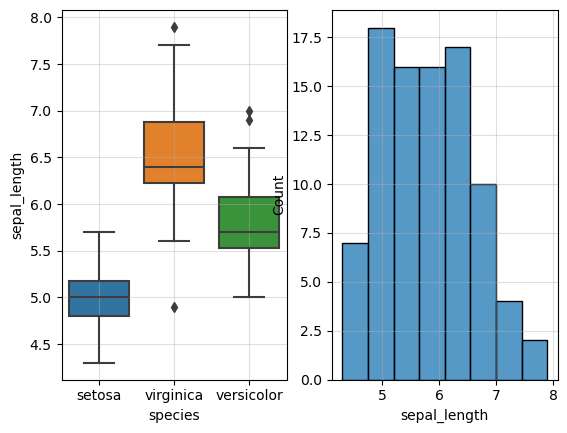

count    90.000000
mean      5.781111
std       0.792081
min       4.300000
25%       5.100000
50%       5.700000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64
sepal_width


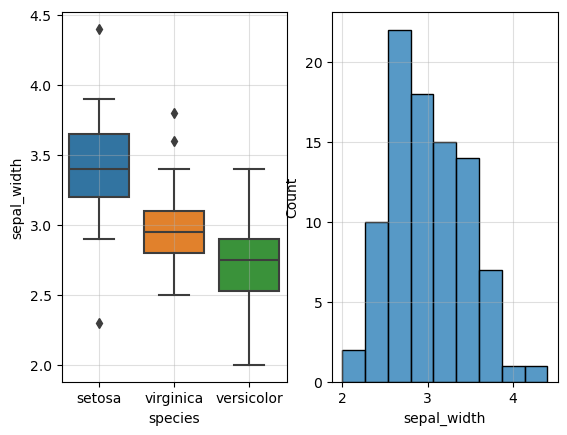

count    90.000000
mean      3.023333
std       0.434741
min       2.000000
25%       2.725000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64
petal_length


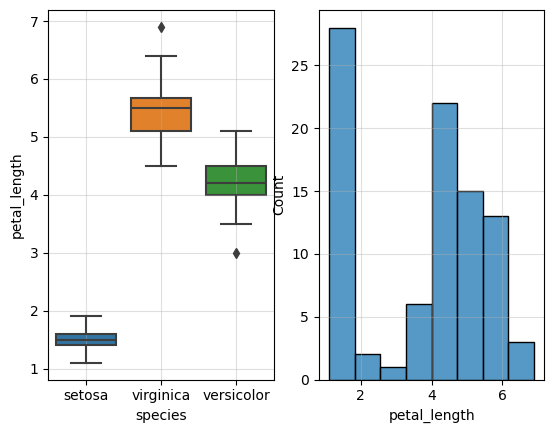

count    90.000000
mean      3.728889
std       1.710526
min       1.100000
25%       1.600000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
petal_width


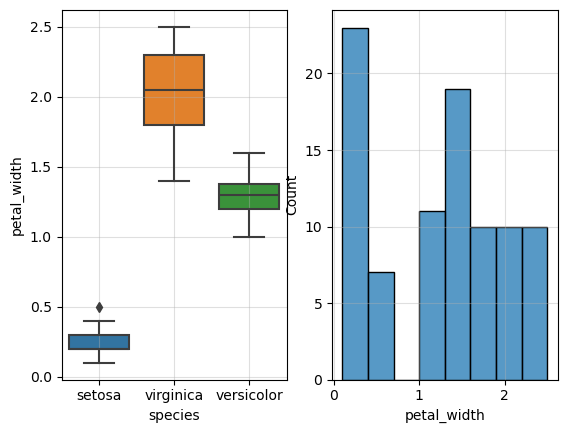

count    90.000000
mean      1.191111
std       0.757679
min       0.100000
25%       0.325000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [466]:
# loop through each continuous variable
for col in con_col:
    print(col)
    plt.subplot(1,2,1)
    sns.boxplot(data=train_iris,y=col,x='species')
    plt.grid(alpha=0.4)
    
    plt.subplot(1,2,2)
    sns.histplot(data=train_iris,x=col)
    # train_iris[col].value_counts().sort_index().plot.hist()
    plt.grid(alpha=0.4)
    
    plt.show()
    print(train_iris[col].describe())

- Virginica in all variables except sepal width leans towards having larger lengths and widths
- Setosa tends to be the smallest except for sepal width, where it is the largest

In [469]:
# Assuming your DataFrame is named df and 'species' is the column of interest
frequency_table = train_iris['species'].value_counts(normalize=True).reset_index()
frequency_table.columns = ['species', 'frequency']
print(frequency_table)

      species  frequency
0      setosa   0.333333
1   virginica   0.333333
2  versicolor   0.333333


species
setosa        0.333333
virginica     0.333333
versicolor    0.333333
Name: proportion, dtype: float64


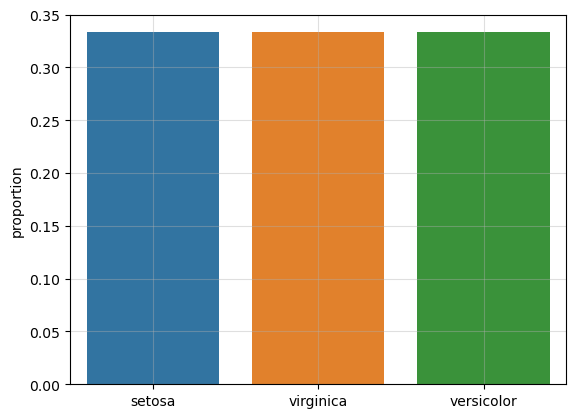

In [475]:
# print the frequency table
print(train_iris.species.value_counts(normalize=True))

# print the barplot
sns.barplot(data=train_iris,x=species,y=train_iris.species.value_counts(normalize=True))

plt.grid(alpha=0.4)
plt.show()

> We can see by the frequency table and bar plot that the species show up in equal proportion

3. Bivariate Stats
    - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
    - For each measurement type, compute the descriptive statistics for each species.
    - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.
    - Document takeaways & any actions.

sepal_length


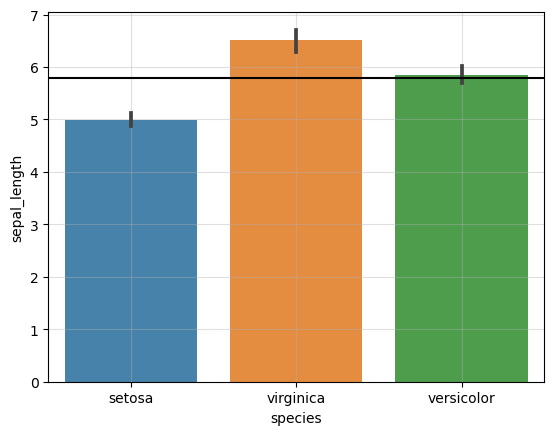

sepal_width


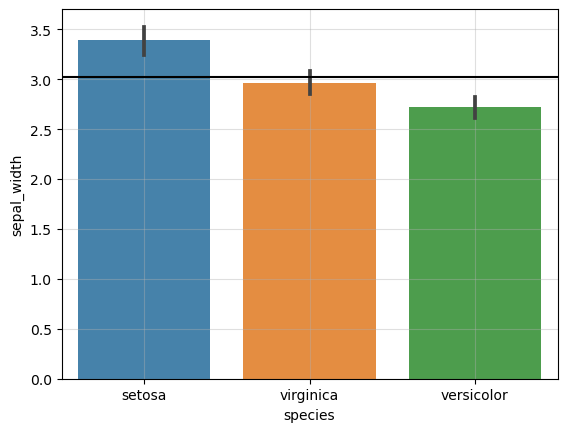

petal_length


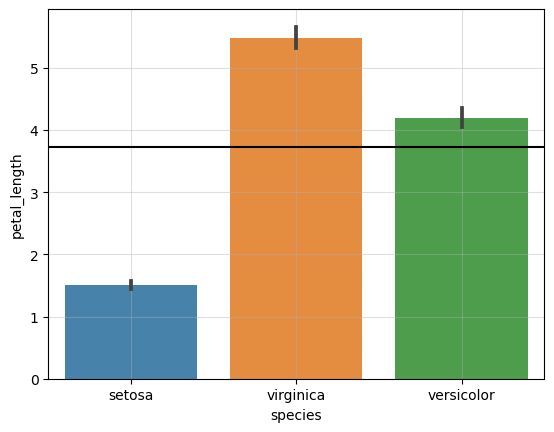

petal_width


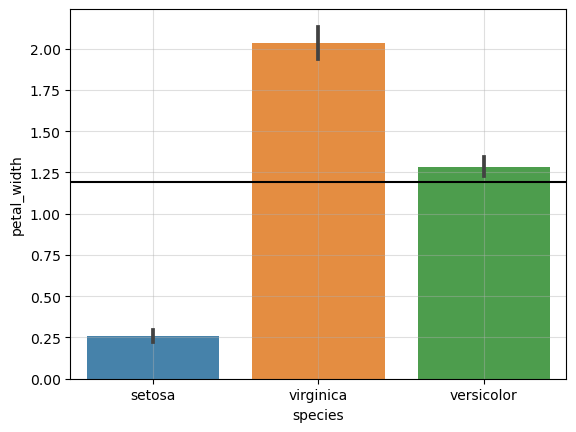

In [508]:
# visualize each measurement
for col in con_col:
    print(col)
    sns.barplot(data=train_iris,y=col,x='species',alpha=0.9)
    plt.axhline(y=train_iris[col].mean(),c='black')
    
    plt.grid(alpha=0.4)
    plt.show()

> I notice that with the exception of sepal width, setosa always falls below the mean
>
> Virginica also rises above the mean with the exception of sepal width
>
> Versicolor usually is above or at the mean except for sepal width
>
> Sepal width seems to cause deviances from the norm of the other plots

In [536]:
# show the descriptive stats for each species per variable
for col in con_col:
    print(col)
    print(train_iris.groupby(by='species')[col].describe())
    print()

sepal_length
            count      mean       std  min    25%  50%    75%  max
species                                                           
setosa       30.0  4.993333  0.354219  4.3  4.800  5.0  5.175  5.7
versicolor   30.0  5.843333  0.478996  5.0  5.525  5.7  6.075  7.0
virginica    30.0  6.506667  0.616404  4.9  6.225  6.4  6.875  7.9

sepal_width
            count  mean       std  min    25%   50%   75%  max
species                                                       
setosa       30.0  3.39  0.384484  2.3  3.200  3.40  3.65  4.4
versicolor   30.0  2.72  0.303315  2.0  2.525  2.75  2.90  3.4
virginica    30.0  2.96  0.319050  2.5  2.800  2.95  3.10  3.8

petal_length
            count      mean       std  min  25%  50%    75%  max
species                                                         
setosa       30.0  1.510000  0.178789  1.1  1.4  1.5  1.600  1.9
versicolor   30.0  4.196667  0.444494  3.0  4.0  4.2  4.500  5.1
virginica    30.0  5.480000  0.508141  4.5  5.1  5

> The stats don't seem to show anything new that we don't see in the above barplots

In [579]:
# use mann-whitney test
alpha = 0.05

# print hypothesis statements
print('H_0: There is no difference in petal width between versicolor and virginica.')
print('H_a: There is a difference in petal width between versicolor and virginica.')
print()

# isolate versicolor and virginica
versicolor = train_iris[train_iris.species == 'versicolor'].petal_width
virginica = train_iris[train_iris.species == 'virginica'].petal_width

# compare petal width
print(f'Mean of versicolor: {versicolor.mean()} > mean of virginica: {virginica.mean()} \n{versicolor.mean() > virginica.mean()}')
print()
# run mann-whitney test to verify and prove comparison


t,p = stats.mannwhitneyu(versicolor,virginica)

if p < alpha:
    print('Reject the null hypothesis')
    print('There is a difference in petal width between versicolor and virginica.')
else:
    print('Fail to reject the null hypothesis')
    print('There is no difference in petal width between versicolor and virginica.')

H_0: There is no difference in petal width between versicolor and virginica.
H_a: There is a difference in petal width between versicolor and virginica.

Mean of versicolor: 1.2833333333333334 > mean of virginica: 2.033333333333333 
False

Reject the null hypothesis
There is a difference in petal width between versicolor and virginica.


In [593]:
# make for loop for each measurement stat
for col in con_col:
    print(f'H_0: There is no difference in {col} between versicolor and virginica.')
    print(f'H_a: There is a difference in {col} between versicolor and virginica.')
    print()
    
    # isolate versicolor and virginica
    versicolor = train_iris[train_iris.species == 'versicolor'][col]
    virginica = train_iris[train_iris.species == 'virginica'][col]
    
    # compare petal width
    print(f'Mean of versicolor: {versicolor.mean()} > mean of virginica: {virginica.mean()} \n{versicolor.mean() > virginica.mean()}')
    print()
    
    t,p = stats.mannwhitneyu(versicolor,virginica)

    if p < alpha:
        print('Reject the null hypothesis')
        print(f'There is a difference in {col} between versicolor and virginica.')
        print()
    else:
        print('Fail to reject the null hypothesis')
        print(f'There is no difference in {col} between versicolor and virginica.')
        print()

H_0: There is no difference in sepal_length between versicolor and virginica.
H_a: There is a difference in sepal_length between versicolor and virginica.

Mean of versicolor: 5.843333333333334 > mean of virginica: 6.506666666666667 
False

Reject the null hypothesis
There is a difference in sepal_length between versicolor and virginica.

H_0: There is no difference in sepal_width between versicolor and virginica.
H_a: There is a difference in sepal_width between versicolor and virginica.

Mean of versicolor: 2.7199999999999998 > mean of virginica: 2.9599999999999995 
False

Reject the null hypothesis
There is a difference in sepal_width between versicolor and virginica.

H_0: There is no difference in petal_length between versicolor and virginica.
H_a: There is a difference in petal_length between versicolor and virginica.

Mean of versicolor: 4.196666666666666 > mean of virginica: 5.4799999999999995 
False

Reject the null hypothesis
There is a difference in petal_length between vers

> As expected, there is a difference in each measurement between versicolor and virginica.
>
> Virginica tends to dominate over versicolor in size.

4. Multivariate Stats
    - Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
    - Visualize two numeric variables of the species. Hint: `sns.relplot` with `hue` or `col`
    - Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
    - Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).
    - Document takeaways and any actions.

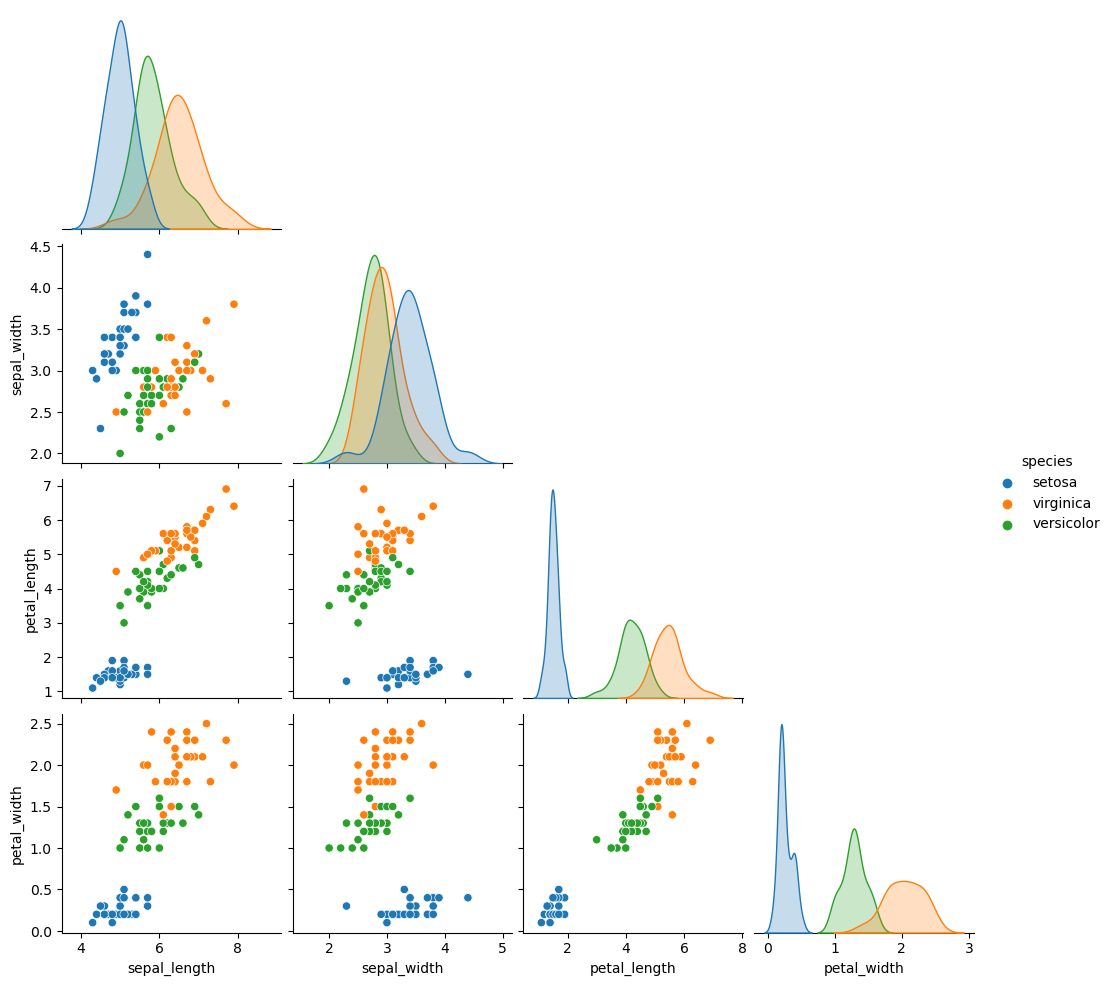

In [604]:
# visualize each measurement using pairplot
sns.pairplot(data=train_iris,corner=True,hue='species')

plt.show()

----
### Part II

Explore your `titanic` dataset more completely.

- Determine drivers of the target variable
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

----
### Part III

- Explore your `telco` data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.